In [1]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
import matplotlib.pyplot as plt
import math
from qiskit.circuit.library import GroverOperator

# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_TOKEN>")

# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="<MY_IBM_QUANTUM_TOKEN>",
#     set_as_default=True,
#     # Use `overwrite=True` if you're updating your token.
#     overwrite=True,
# )
 
# Load saved credentials
service = QiskitRuntimeService()

# Exercice 1

In [2]:

backends = service.backends()

simulator_backends = []
other_backends = []

for backend in backends:
	status = backend.status()
	name = status.backend_name
	is_operational = status.operational
	jobs_in_queue = status.pending_jobs
	num_qubits = backend.configuration().n_qubits
	is_simulator = backend.configuration().simulator
	
	if is_simulator:
		simulator_backends.append(f"{name:<35} has {jobs_in_queue:<4} queues")
	else:
		other_backends.append(f"{name:<35} has {jobs_in_queue:<4} queues with {num_qubits:<4} qubits")

# Print simulator backends first
print("Simulated quantum computers")
for backend in simulator_backends:
	print(backend)

# Print other backends
print("\n Real qwuantum computers")
for backend in other_backends:
	print(backend)

Simulated quantum computers

 Real qwuantum computers
ibm_brisbane                        has 1    queues with 127  qubits
ibm_kyiv                            has 26   queues with 127  qubits
ibm_kyoto                           has 179  queues with 127  qubits
ibm_sherbrooke                      has 4810 queues with 127  qubits


# Exercice 2

The cloud simulator are gone
https://docs.quantum.ibm.com/api/migration-guides/local-simulators

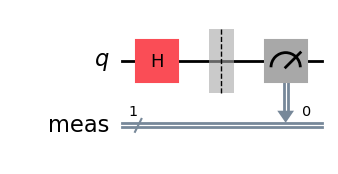

In [3]:
backend = FakeManilaV2()
service = QiskitRuntimeService()
 
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

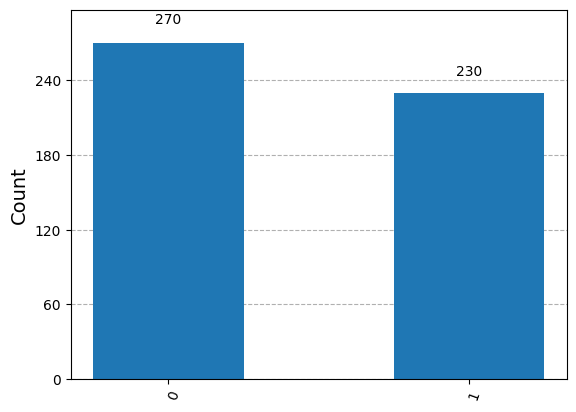

In [4]:
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
# transpiled_circuit.draw('mpl', style="iqp")
 
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit], shots=500)
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

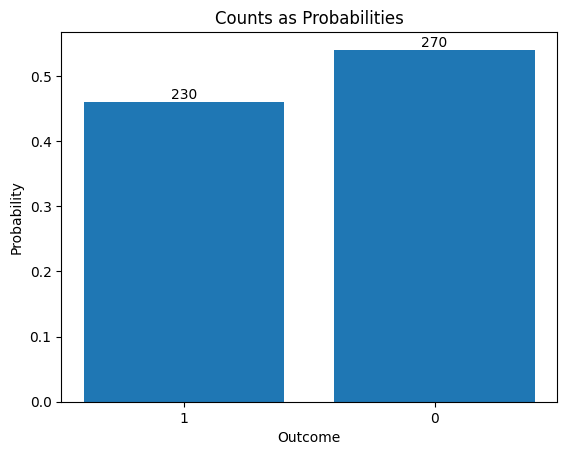

In [5]:
# Calculate probabilities
total_shots = sum(counts.values())
probabilities = [count / total_shots for count in counts.values()]

# Plot probabilities
plt.bar(counts.keys(), probabilities)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Counts as Probabilities')

# Add numbers on the histogram bars
for i, count in enumerate(counts.values()):
	plt.text(i, probabilities[i], str(count), ha='center', va='bottom')

plt.show()

# Exercies 3

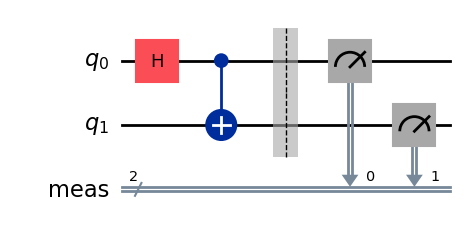

In [6]:
# Bell Circuit
qc = QuantumCircuit(2) # both qubits are initialized to 0
qc.h(0)
qc.cx(0, 1) # entangle qubits, 
qc.measure_all()
qc.draw('mpl')

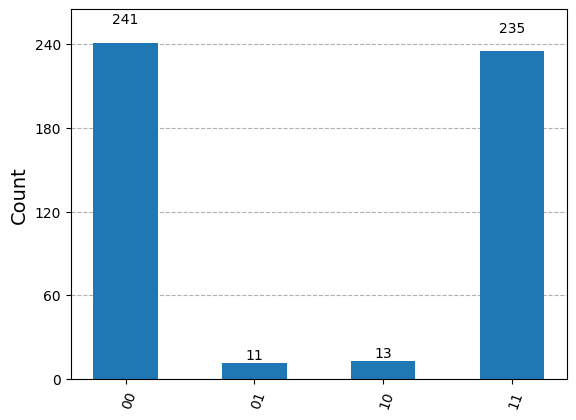

In [7]:
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
# transpiled_circuit.draw('mpl', style="iqp")
 
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit], shots=500)
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

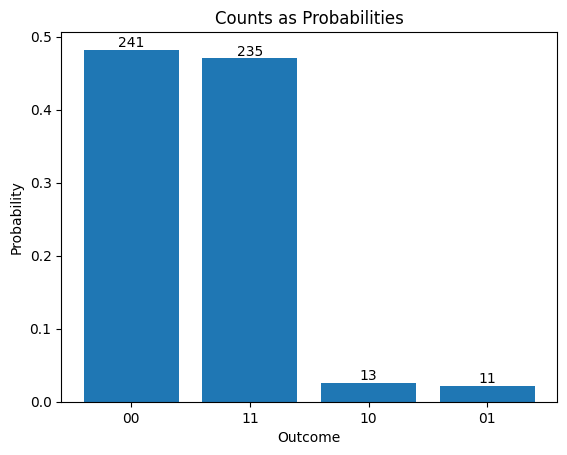

In [8]:
# Calculate probabilities
total_shots = sum(counts.values())
probabilities = [count / total_shots for count in counts.values()]

# Plot probabilities
plt.bar(counts.keys(), probabilities)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Counts as Probabilities')

# Add numbers on the histogram bars
for i, count in enumerate(counts.values()):
	plt.text(i, probabilities[i], str(count), ha='center', va='bottom')

plt.show()

# Exercice 4

In [9]:
# qc = QuantumCircuit(2) # both qubits are initialized to 0
# qc.h(0)
# qc.cx(0, 1)
# qc.measure_all()
# qc.draw('mpl')

# # Exccute this circuit on the real quantum computer with the least queue
# backend = service.backend('ibm_brisbane')
# transpiled_circuit = transpile(qc, backend)
# job = backend.run(transpiled_circuit, shots=500)
# print(job.job_id())

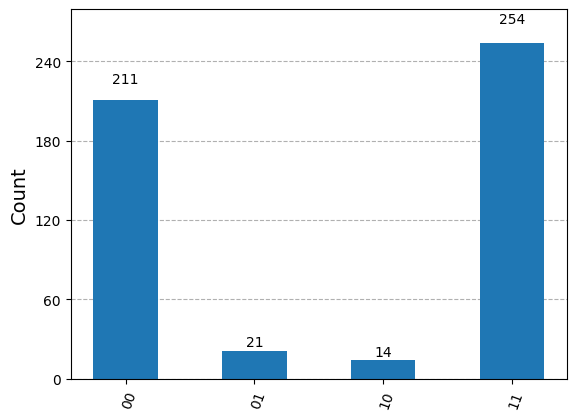

In [10]:
# Get the job ctfbjk2zhysg008t4rfg
job = service.job('ctfbjk2zhysg008t4rfg')
result = job.result()
plot_histogram(result.get_counts())

### Analysis of Quantum Circuit Results

The results from running the quantum circuit on a real quantum computer show some probability of measuring the states |01⟩ and |10⟩. This outcome is expected due to noise and imperfections in the quantum hardware.

#### Possible Reasons for Unexpected States
1. **Noise and Decoherence**: Quantum computers are susceptible to environmental noise, causing qubits to lose their quantum state.
2. **Gate Errors**: Imperfections in the Hadamard (H) and CNOT (CX) gates can introduce errors.
3. **Measurement Errors**: The process of measuring qubits can also lead to incorrect outcomes.

#### Theoretical vs. Practical Results
- **Theoretical State**: After applying the H and CX gates, the expected state is (|00⟩ + |11⟩)/√2, leading to measurements of |00⟩ and |11⟩ with equal probability.
- **Practical Outcome**: Due to noise and errors, we observe some counts for |01⟩ and |10⟩.

#### Mitigation Strategies
- **Error Mitigation Techniques**: Apply error correction codes and other strategies to reduce noise impact.
- **Improving Gate Fidelity**: Use quantum computers with higher gate fidelity.
- **Regular Calibration**: Calibrate the quantum computer regularly to reduce error rates.

By understanding and addressing these errors, we can improve the accuracy of quantum computations on real hardware.


# Ecercie 5

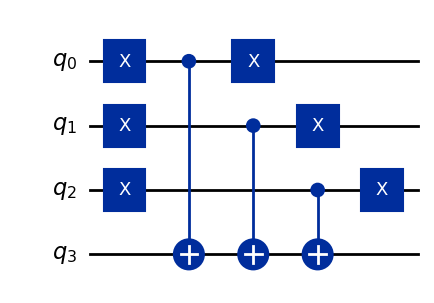

In [11]:
# balanced oracle
oracle_balanced = QuantumCircuit(4, name='oracle_balanced')

# add pauli-x gate
oracle_balanced.x(0)
oracle_balanced.x(1)
oracle_balanced.x(2)

#add cnot gates
oracle_balanced.cx(0, 3)
oracle_balanced.cx(1, 3)
oracle_balanced.cx(2, 3)

#add pauli-x gate
oracle_balanced.x(0)
oracle_balanced.x(1)
oracle_balanced.x(2)

oracle_balanced.draw('mpl')

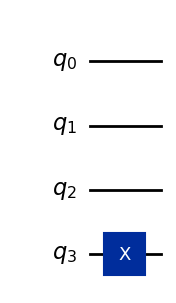

In [12]:
# Constant oracle
oracle_constant = QuantumCircuit(4, name='oracle_constant')
oracle_constant.x(3)

oracle_constant.draw('mpl')

## Constant

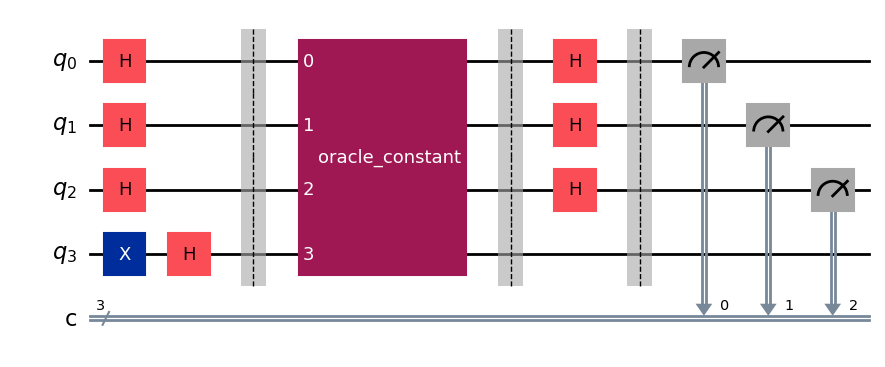

In [13]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm
qc = QuantumCircuit(4, 3) # 4 qubits and 4 classical bits
qc.x(3)
# Apply Hadamard gate to all qubits
qc.h([0, 1, 2, 3])
qc.barrier()

qc.append(oracle_constant, [0, 1, 2, 3]) 
qc.barrier()

qc.h([0, 1, 2])
qc.barrier()

qc.measure([0, 1, 2], [0, 1, 2])

qc.draw('mpl')

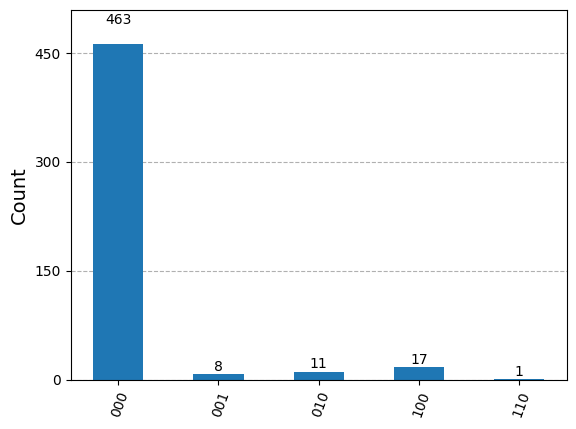

In [14]:
backend = FakeManilaV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")
 
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit], shots=500)
pub_result = job.result()[0]
counts = pub_result.data.c.get_counts()
plot_histogram(counts)

Expected triple 0 if f is constant

## Balanced

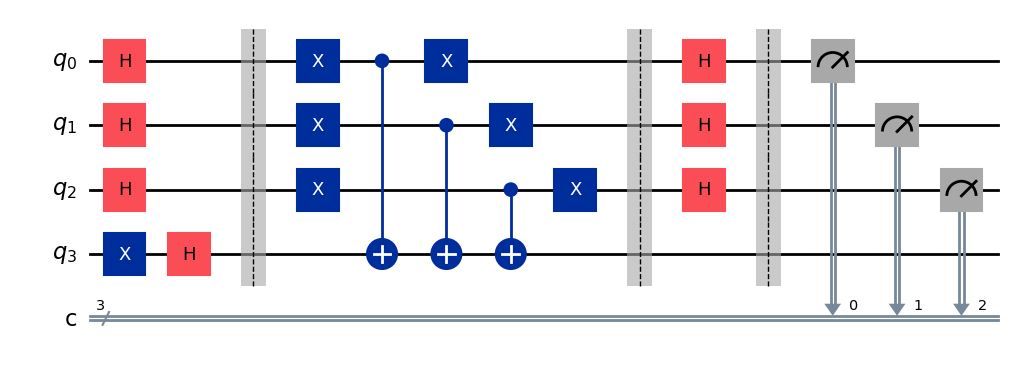

In [15]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm
qc = QuantumCircuit(4, 3) # 4 qubits and 4 classical bits

qc.x(3)
# Apply Hadamard gate to all qubits
qc.h([0, 1, 2, 3])
qc.barrier()

# qc.append(oracle_balanced, [0, 1, 2, 3])
qc.compose(oracle_balanced, inplace=True) 
qc.barrier()

qc.h([0, 1, 2])
qc.barrier()

qc.measure([0, 1, 2], [0, 1, 2])

qc.draw('mpl')

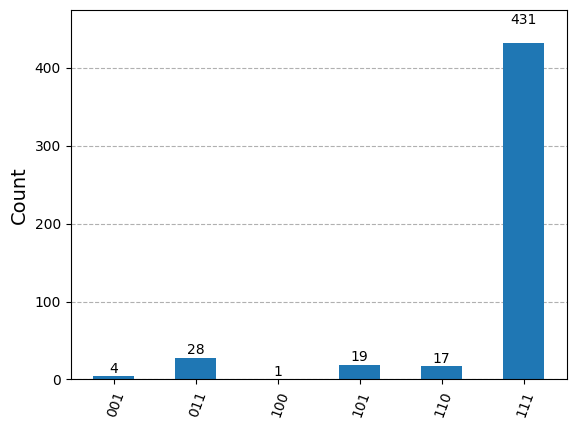

In [16]:
backend = FakeManilaV2()

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")
 
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit], shots=500)
pub_result = job.result()[0]
counts = pub_result.data.c.get_counts()
plot_histogram(counts)

According to the ibm doc, 1 means balanced

# Exercice 6

Surement grover algorithm

Vous devrez avoir 3 parties distinctes:
• L’Oracle.
• L’initialisation des états.
• Le Diffuser

Creer des functions pour chaque partie

https://chatgpt.com/c/8b2fa060-6f16-47d6-96ef-d17a0eed9bc4

In [17]:
# https://learning.quantum.ibm.com/tutorial/grovers-algorithm
def init_oracle_example():
	oracle = QuantumCircuit(3, name='oracle')
	oracle.h(2)
	oracle.ccx(0, 1, 2)
	oracle.h(2)
	oracle.draw('mpl')

	return oracle

def init_circuit(oracle):
	# optimal_num_iterations = math.floor(
	# 	math.pi / (4 * math.asin(math.sqrt(4 / 2**grover_op.num_qubits)))
	# )
	optimal_num_iterations = 1

	num_qubits = oracle.num_qubits
	if num_qubits < 2:
		raise ValueError('The oracle must have at least 2 qubits')

	qc = QuantumCircuit(num_qubits, num_qubits)
	qc.h(range(num_qubits))
	qc.barrier()
	qc.compose(oracle.power(optimal_num_iterations), inplace=True)
	qc.barrier()
	# qc.h(range(num_qubits))
	qc.measure(range(num_qubits), range(num_qubits))
	qc.draw('mpl')

	return qc

def run_simulation(qc, backend):
	# Transpile the ideal circuit to a circuit that can be directly executed by the backend
	transpiled_circuit = transpile(qc, backend)
	transpiled_circuit.draw('mpl', style="iqp")

	# Run the transpiled circuit using the simulated fake backend
	sampler = SamplerV2(backend)
	job = sampler.run([transpiled_circuit], shots=500)
	return job


 

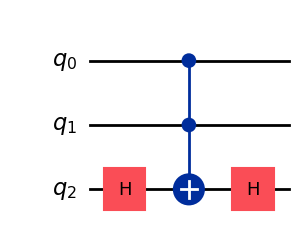

In [18]:
oracle = init_oracle_example()
oracle.draw('mpl')

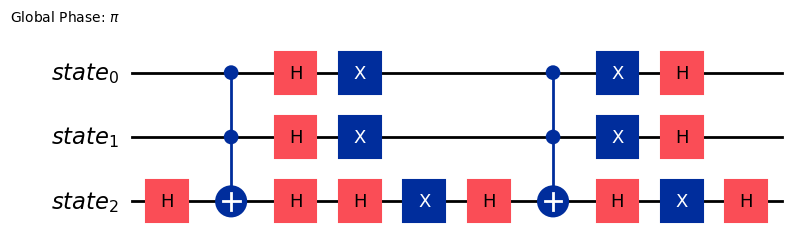

In [19]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

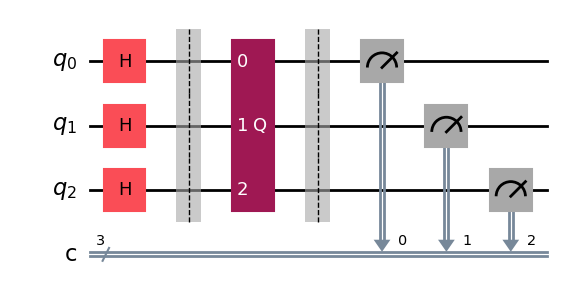

In [20]:
qc = init_circuit(grover_op)
qc.draw('mpl')

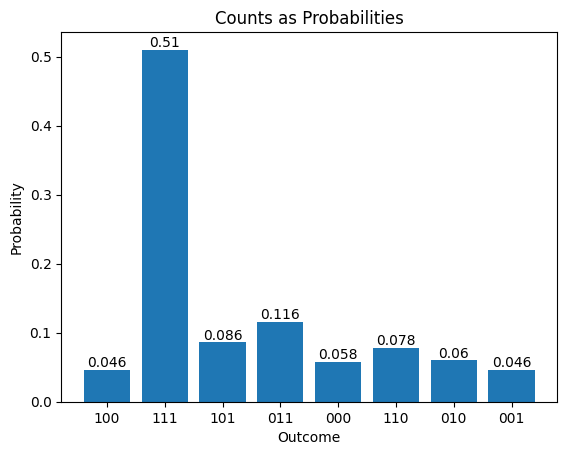

In [21]:
backend = FakeManilaV2()

job = run_simulation(qc, backend)
pub_result = job.result()[0]
counts = pub_result.data.c.get_counts()
# Calculate probabilities
total_shots = sum(counts.values())
probabilities = [count / total_shots for count in counts.values()]

# Plot probabilities
plt.bar(counts.keys(), probabilities)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Counts as Probabilities')

# Add numbers on the histogram bars
for i, count in enumerate(counts.values()):
	plt.text(i, probabilities[i], str(count/total_shots)  , ha='center', va='bottom')

plt.show()
